<a href="https://colab.research.google.com/github/mati1312/AS2/blob/main/Copy_of_ego_facebook_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall networkx -y
!pip uninstall python-louvain -y
!pip uninstall community -y
!pip install python-louvain
!pip install networkx
!pip install cdlib

from cdlib import algorithms
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

Found existing installation: networkx 3.4.2
Uninstalling networkx-3.4.2:
  Successfully uninstalled networkx-3.4.2
Found existing installation: python-louvain 0.16
Uninstalling python-louvain-0.16:
  Successfully uninstalled python-louvain-0.16
Found existing installation: community 1.0.0b1
Uninstalling community-1.0.0b1:
  Successfully uninstalled community-1.0.0b1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.5 MB/s eta 0:00:00
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9388 sha256=de80b9045f5133c94517291cb148de14af8ecb369c67405a47cf83ea84de05cf
  Stored in directory: /root/.cache/pip/wheels/d0/b0/d7/6dd26c3817810fa379088eaeb755a01d9a2a411c37632079d1
Successfully built python-louvain


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.6/263.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 85.5 MB/s eta 0:00:00
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'bayanpy', 'graph_tool', 'infomap', 'leidenalg'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer', 'leidenalg'}


In [ ]:
g = nx.read_edgelist("facebook_combined.txt", create_using=nx.Graph(), nodetype=int)
#print(nx.info(g))
print("Number of nodes:", g.number_of_nodes())
print("Number of edges:", g.number_of_edges())
print("Graph is directed:", g.is_directed())

spring_pos = nx.spring_layout(g)

Number of nodes: 4039
Number of edges: 88234
Graph is directed: False


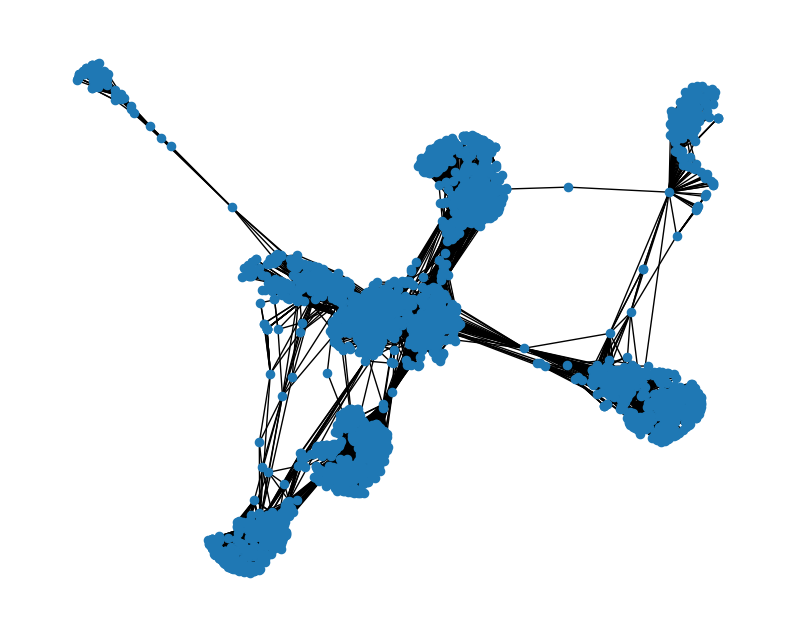

In [ ]:
plt.figure(figsize=(10, 8))
plt.axis("off")
nx.draw_networkx(g, pos=spring_pos, cmap=plt.get_cmap("jet"), node_size=35, with_labels=False)
plt.show()

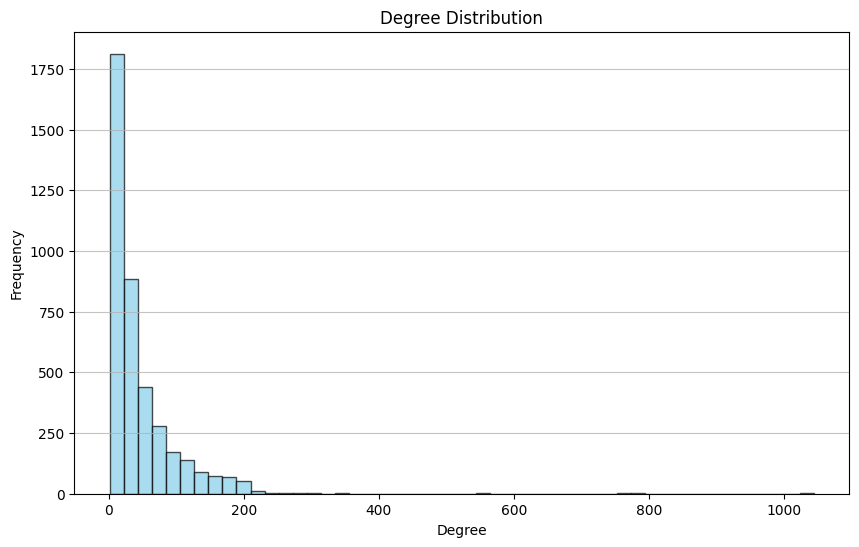

In [ ]:
# Compute the degree of each node
degrees = [deg for node, deg in g.degree()]

plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
# Calculate the average shortest path length
average_path_length = nx.average_shortest_path_length(g)
print("Average Shortest Path Length:", average_path_length)

# Calculate the average clustering coefficient of the graph
average_clustering_coefficient = nx.average_clustering(g)
print("Average Clustering Coefficient:", average_clustering_coefficient)

# Calculate assortativity in the graph
assortativity = nx.degree_assortativity_coefficient(g)
print("Assortativity Coefficient:", assortativity)

Average Shortest Path Length: 3.6925068496963913
Average Clustering Coefficient: 0.6055467186200876
Assortativity Coefficient: 0.06357722918564943


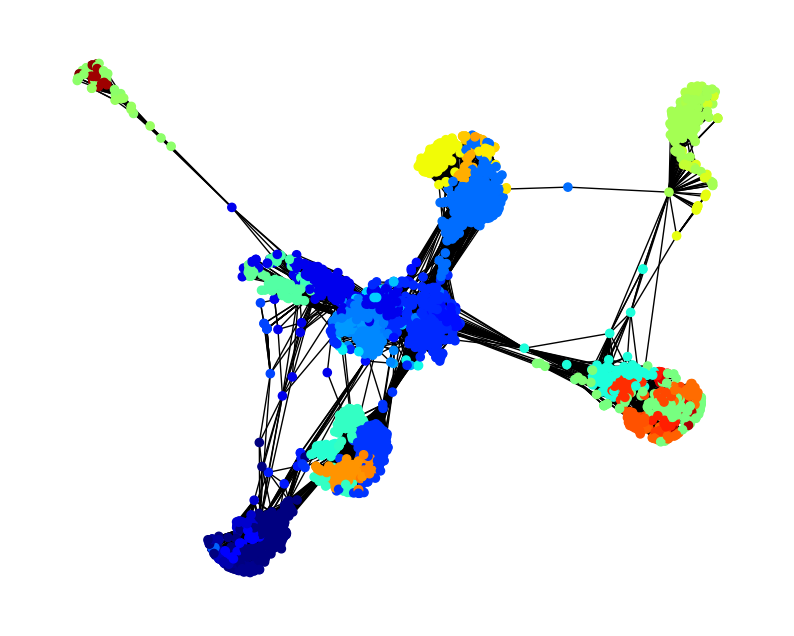

In [ ]:
# Perform community detection using the Louvain method
# Create a mapping of nodes to their respective community
parts = community.asyn_lpa_communities(g)
node_community = {node: cid for cid, nodes in enumerate(parts) for node in nodes}

plt.figure(figsize=(10, 8))
plt.axis("off")
nx.draw_networkx(g, pos=spring_pos, cmap=plt.get_cmap("jet"), node_color=[node_community[node] for node in g.nodes()], node_size=35, with_labels=False)
plt.show()

In [ ]:
# Centrality Measures:

# Calculate degree centrality
degree_centrality = nx.degree_centrality(g)
print("Degree Centrality:")
print(degree_centrality)

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(g)
print("\nBetweenness Centrality:")
print(betweenness_centrality)

# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(g)
print("\nCloseness Centrality:")
print(closeness_centrality)

# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(g)
print("\nEigenvector Centrality:")
print(eigenvector_centrality)

Degree Centrality:
{0: 0.08593363051015354, 1: 0.004210004952947003, 2: 0.0024764735017335313, 3: 0.004210004952947003, 4: 0.0024764735017335313, 5: 0.0032194155522535907, 6: 0.0014858841010401188, 7: 0.004952947003467063, 8: 0.001981178801386825, 9: 0.014115898959881128, 10: 0.0024764735017335313, 11: 0.00024764735017335313, 12: 0.00024764735017335313, 13: 0.007677067855373947, 14: 0.003714710252600297, 15: 0.00024764735017335313, 16: 0.002228826151560178, 17: 0.0032194155522535907, 18: 0.00024764735017335313, 19: 0.00396235760277365, 20: 0.003714710252600297, 21: 0.016097077761267953, 22: 0.0027241208519068845, 23: 0.004210004952947003, 24: 0.00396235760277365, 25: 0.017087667161961365, 26: 0.016840019811788013, 27: 0.0012382367508667657, 28: 0.0032194155522535907, 29: 0.0032194155522535907, 30: 0.004210004952947003, 31: 0.005695889053987122, 32: 0.0014858841010401188, 33: 0.0004952947003467063, 34: 0.0012382367508667657, 35: 0.0004952947003467063, 36: 0.0027241208519068845, 37: 0.00

Initial Giant Component Size: 4039


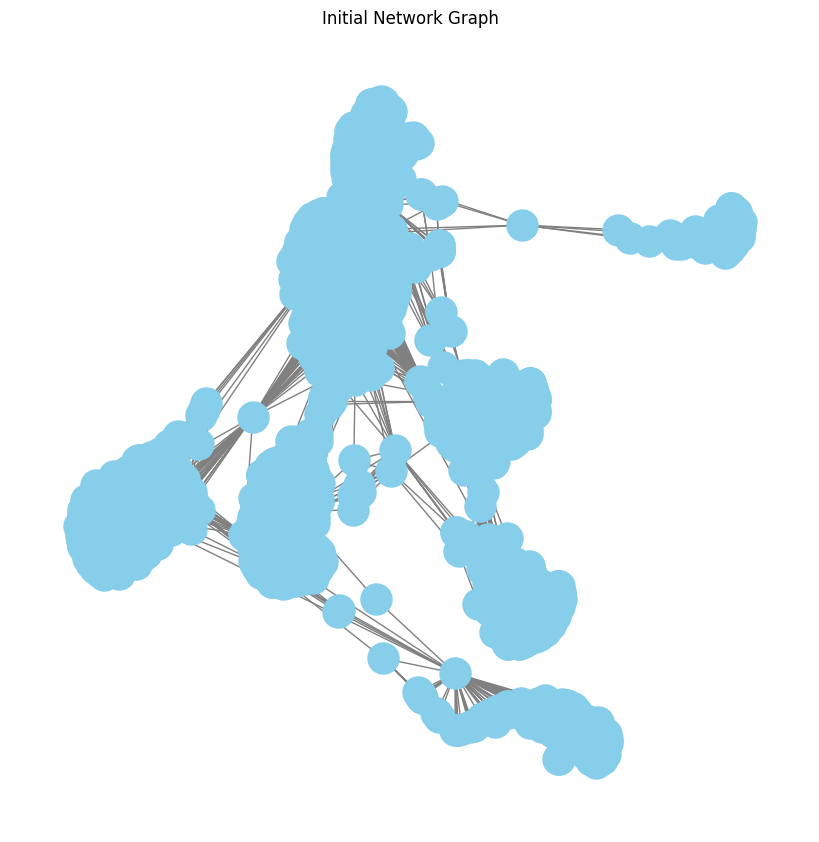

Iteration 1: Removed Node 2679. Giant Component Size: 4038


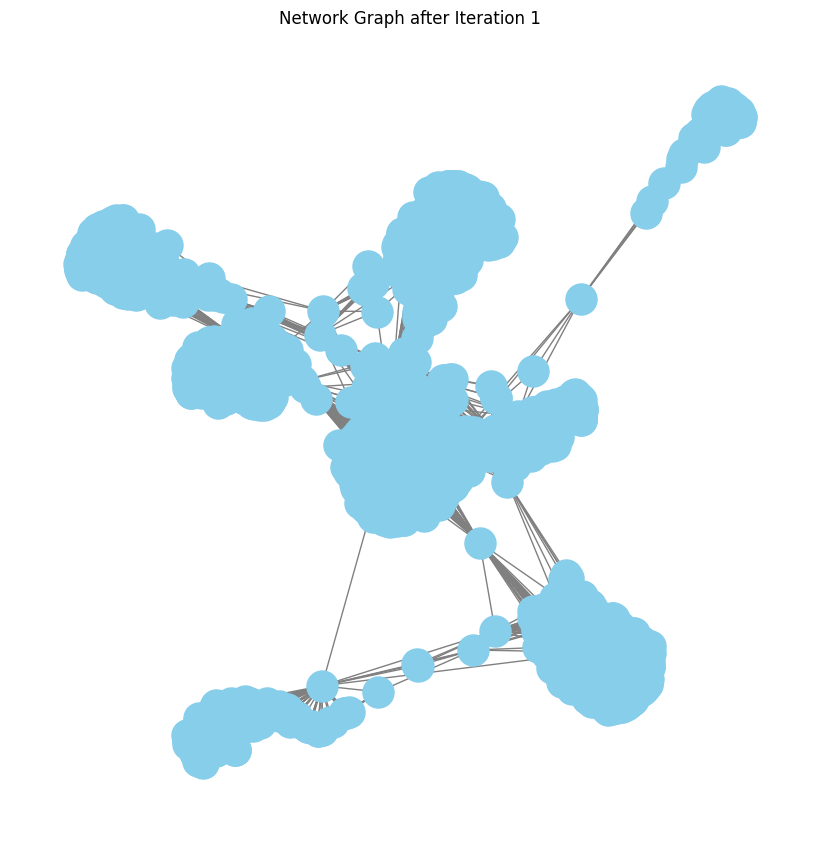

Iteration 2: Removed Node 3353. Giant Component Size: 4037


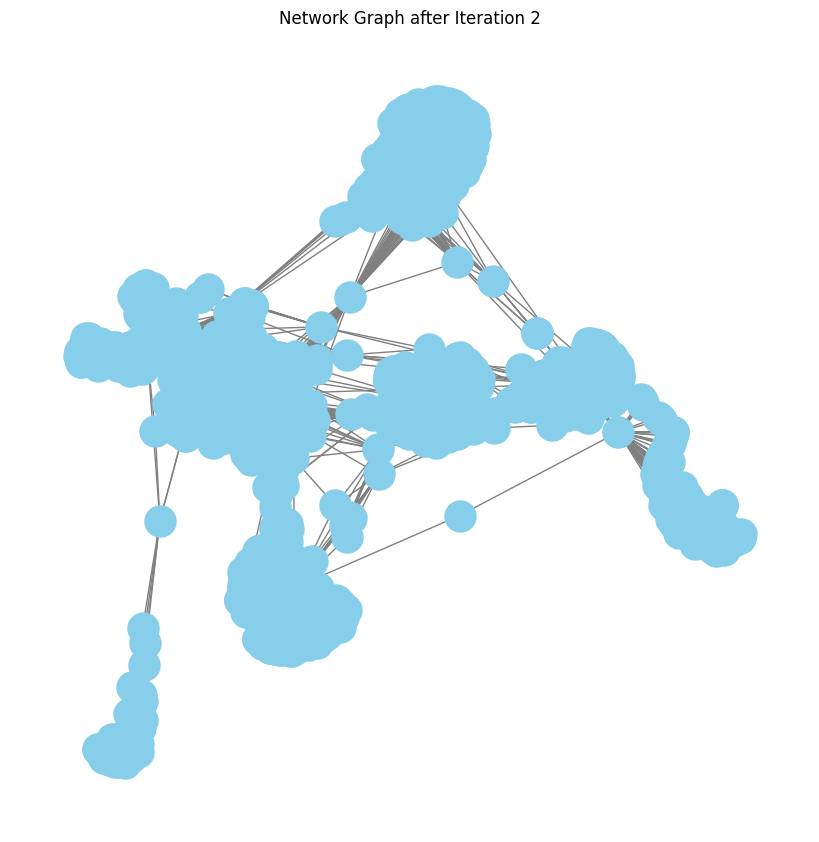

Iteration 3: Removed Node 3919. Giant Component Size: 4036


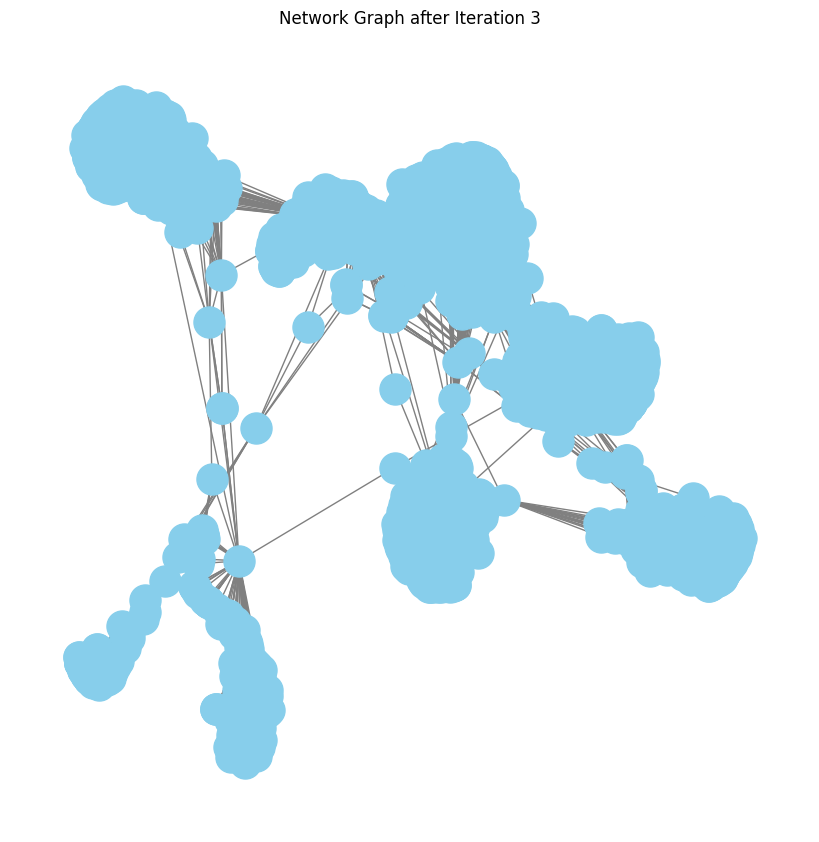

Iteration 4: Removed Node 3418. Giant Component Size: 4035


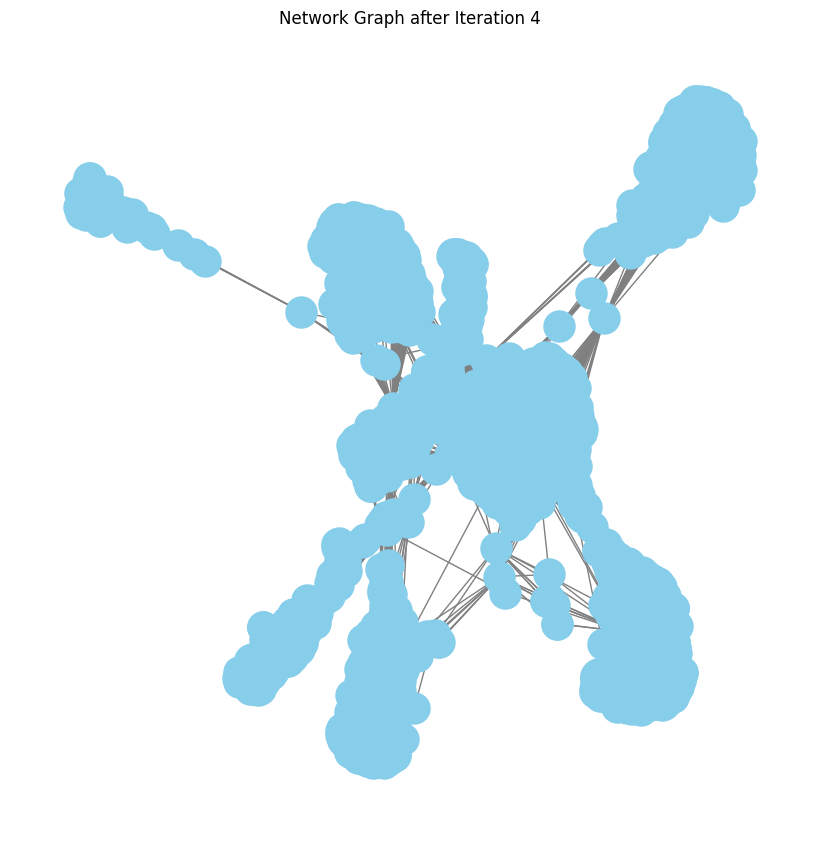

Iteration 5: Removed Node 1269. Giant Component Size: 4034


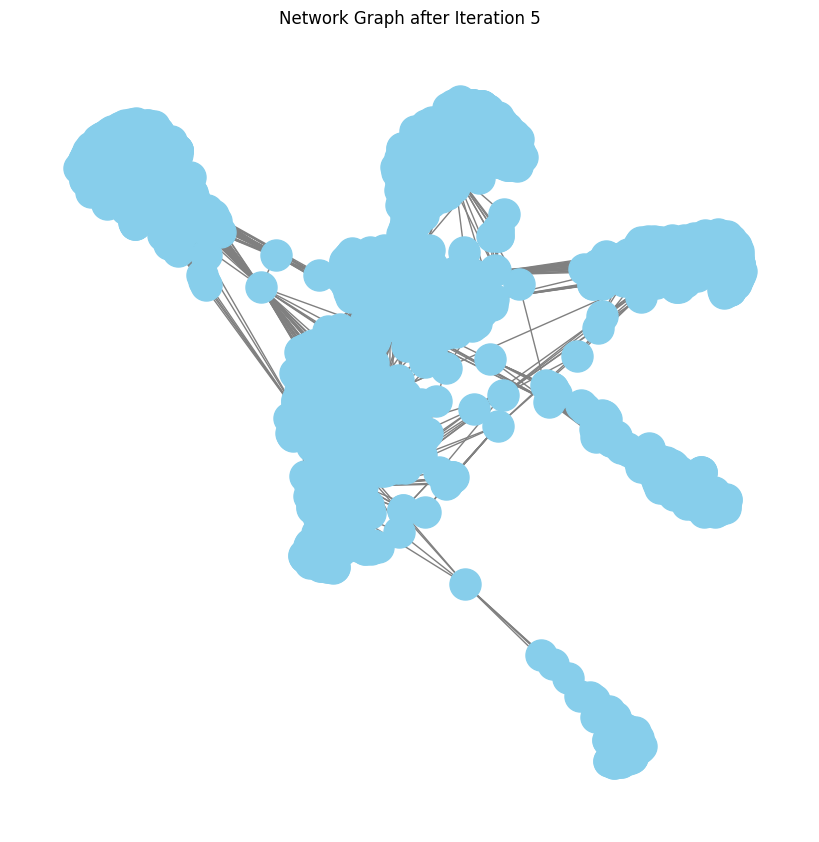

Iteration 6: Removed Node 2314. Giant Component Size: 4033


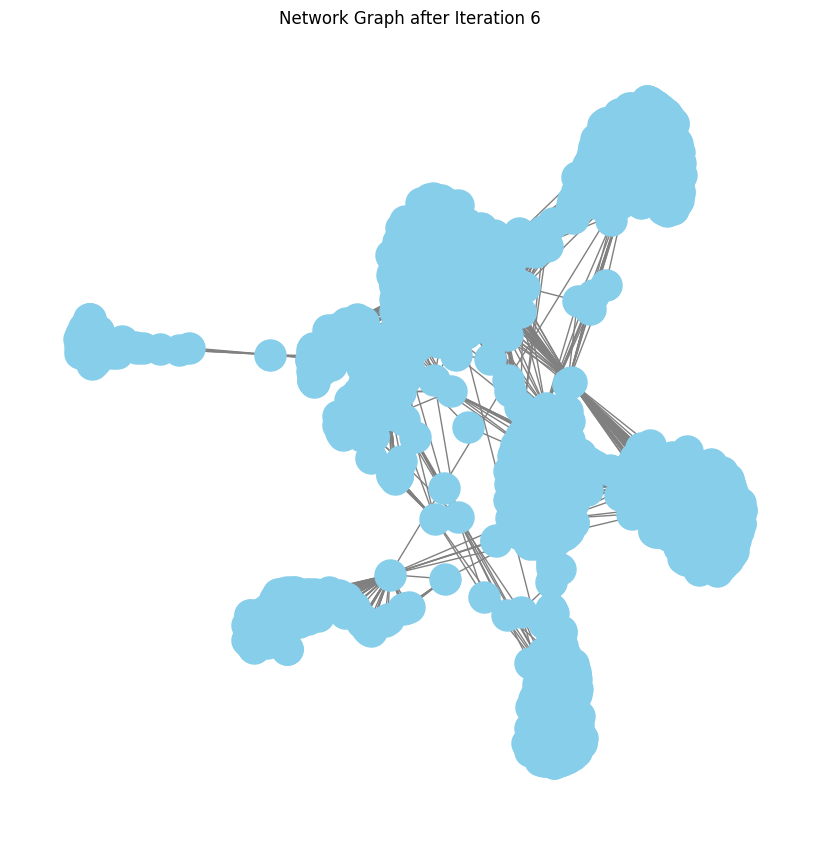

Iteration 7: Removed Node 2734. Giant Component Size: 4032


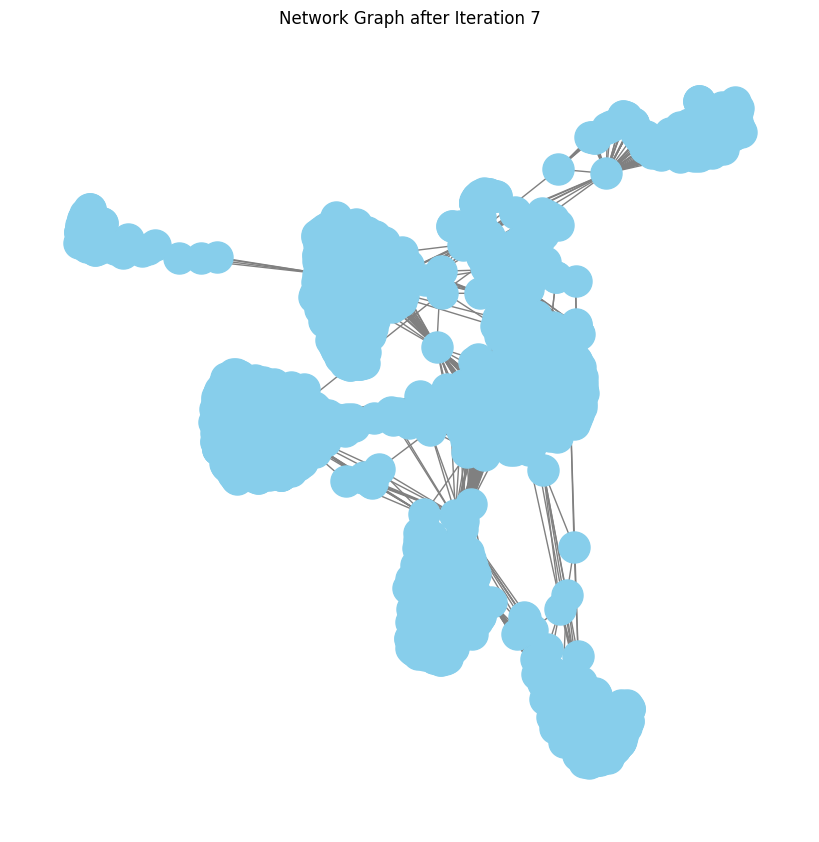

Iteration 8: Removed Node 1063. Giant Component Size: 4031


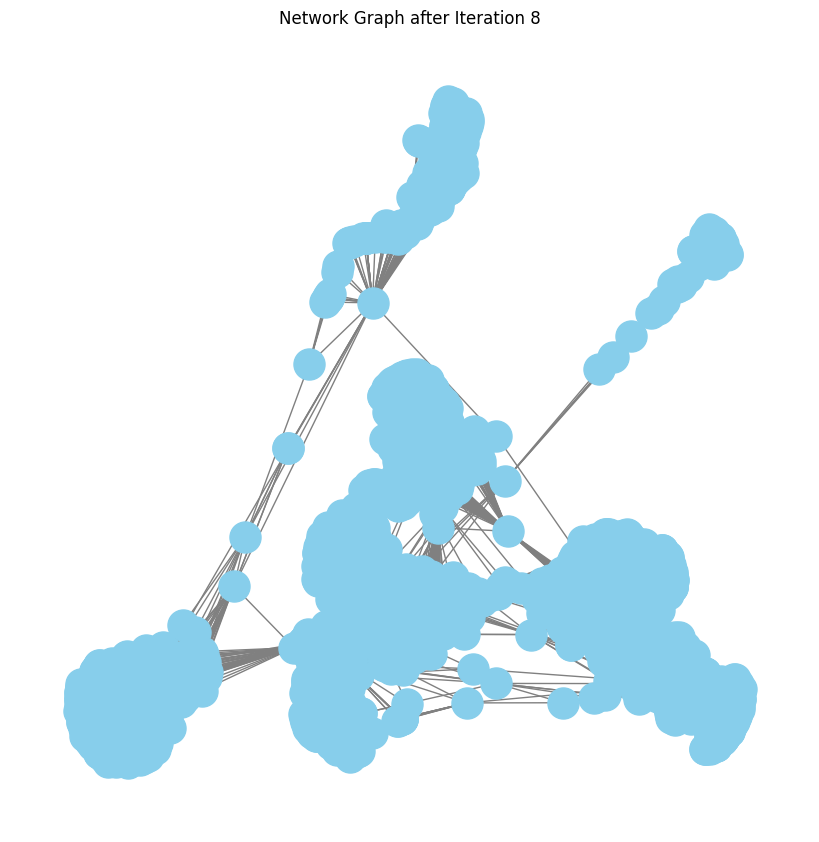

Iteration 9: Removed Node 627. Giant Component Size: 4030


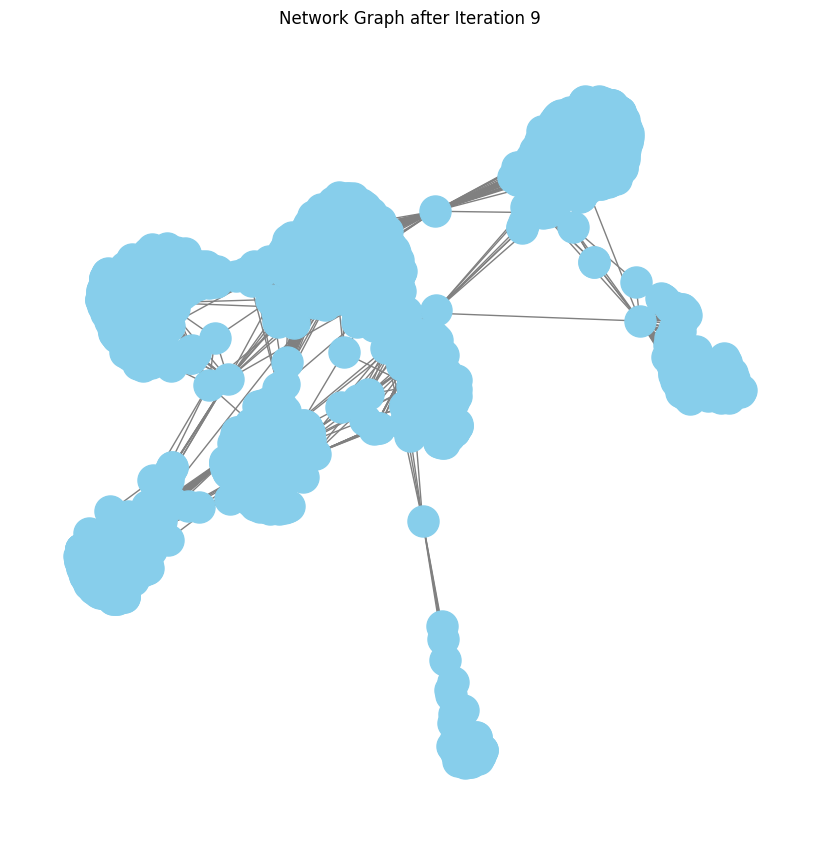

Iteration 10: Removed Node 3. Giant Component Size: 4029


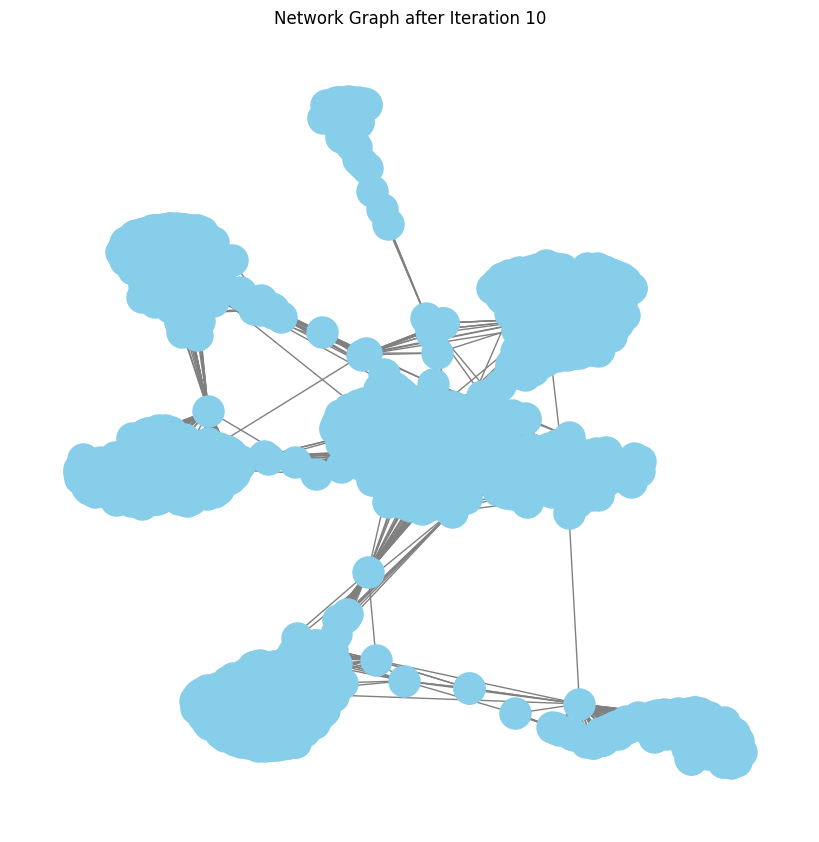

Final Giant Component Size: 4029


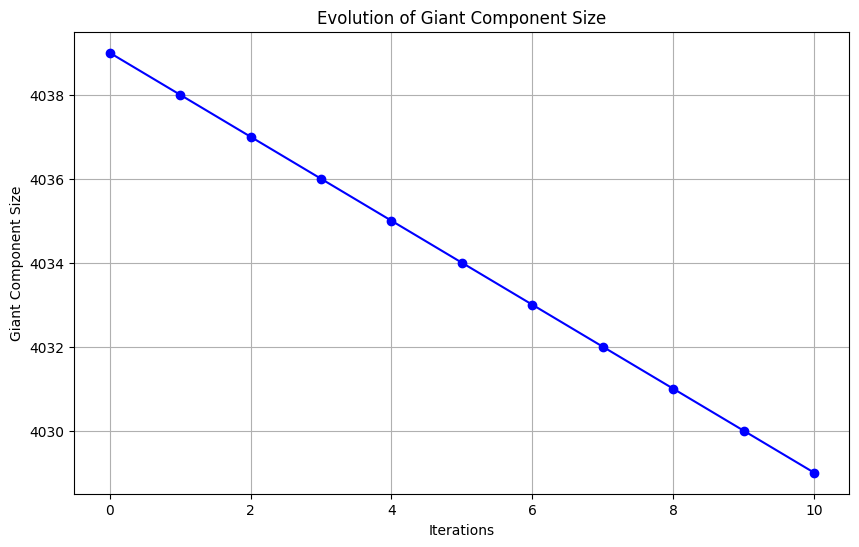

In [ ]:
import random

# Function to calculate the size of the largest connected component
def get_giant_component_size(graph):
    components = list(nx.connected_components(graph))
    if len(components) == 0:
        return 0
    return len(max(components, key=len))

def visualize_network(graph, title):
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=False, node_color='skyblue', node_size=500, edge_color='gray')
    plt.title(title)
    plt.show()

# Simulate random node removal and measure network connectivity
def analyze_network_robustness(graph, num_iterations=10):
    initial_size = get_giant_component_size(graph)
    print("Initial Giant Component Size:", initial_size)

    giant_component_sizes = [initial_size]

    visualize_network(graph, "Initial Network Graph")

    for i in range(num_iterations):
        node_to_remove = random.choice(list(graph.nodes()))
        graph.remove_node(node_to_remove)
        giant_component_size = get_giant_component_size(graph)
        giant_component_sizes.append(giant_component_size)

        print(f"Iteration {i+1}: Removed Node {node_to_remove}. Giant Component Size: {giant_component_size}")

        visualize_network(graph, f"Network Graph after Iteration {i+1}")

    final_size = get_giant_component_size(graph)
    print("Final Giant Component Size:", final_size)

    # Plot the evolution of the giant component size
    plt.figure(figsize=(10, 6))
    plt.plot(range(num_iterations + 1), giant_component_sizes, marker='o', color='b', linestyle='-')
    plt.xlabel('Iterations')
    plt.ylabel('Giant Component Size')
    plt.title('Evolution of Giant Component Size')
    plt.grid(True)
    plt.show()

analyze_network_robustness(g, num_iterations=10)

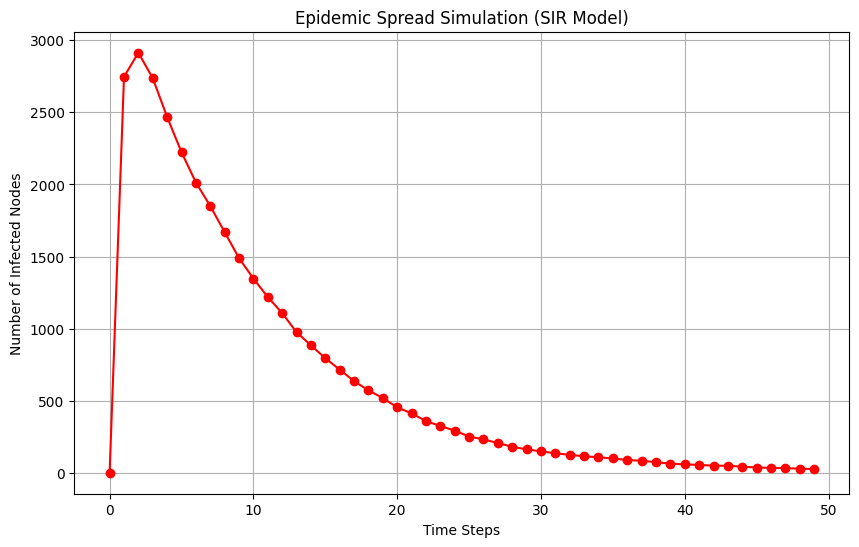

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate the SIR model on a graph
def simulate_epidemic_spread(graph, beta, gamma, initial_infected, num_steps):
    # Initialize node states: 0 for susceptible, 1 for infected, 2 for recovered
    node_states = {node: 0 for node in graph.nodes()}

    # Infect initial nodes
    for node in initial_infected:
        node_states[node] = 1

    infected_counts = []

    for _ in range(num_steps):
        # Store the number of infected nodes at each step
        infected_counts.append(list(node_states.values()).count(1))

        # Iterate over nodes to update their states
        for node in graph.nodes():
            if node_states[node] == 1:  # If the node is infected
                if np.random.rand() < gamma:  # Recover with probability gamma
                    node_states[node] = 2
                else:
                    # Infect neighbors with probability beta
                    for neighbor in graph.neighbors(node):
                        if node_states[neighbor] == 0 and np.random.rand() < beta:
                            node_states[neighbor] = 1

    return infected_counts

# Parameters for the epidemic simulation
beta = 0.3  # Infection rate
gamma = 0.1  # Recovery rate
initial_infected = [0]  # Initial infected nodes
num_steps = 50

# Run the epidemic simulation
infected_counts = simulate_epidemic_spread(g, beta, gamma, initial_infected, num_steps)

# Plot the number of infected nodes over time
plt.figure(figsize=(10, 6))
plt.plot(range(num_steps), infected_counts, marker='o', color='r', linestyle='-')
plt.xlabel('Time Steps')
plt.ylabel('Number of Infected Nodes')
plt.title('Epidemic Spread Simulation (SIR Model)')
plt.grid(True)
plt.show()

In [ ]:
# Function to recommend friends based on Jaccard coefficient
def friend_recommendation(graph, node):
    neighbors = set(graph.neighbors(node))
    potential_friends = set()

    # Iterate through each neighbor of node
    for n in graph.nodes():
        if n != node and not graph.has_edge(node, n):
            neighbors2 = set(graph.neighbors(n))
            jaccard_coefficient = len(neighbors.intersection(neighbors2)) / len(neighbors.union(neighbors2))
            potential_friends.add((n, jaccard_coefficient))

    # Sort potential friends by Jaccard coefficient in descending order
    recommended_friends = sorted(potential_friends, key=lambda x: x[1], reverse=True)

    return recommended_friends

# Node for which we want to recommend friends
target_node = 0

# Get friend recommendations for the target node
recommendations = friend_recommendation(g, target_node)

# Display top recommended friends
print(f"Friend Recommendations for Node {target_node}:")
for friend, score in recommendations[:5]:
    print(f"Friend: {friend}, Jaccard Coefficient: {score}")

Friend Recommendations for Node 0:
Friend: 348, Jaccard Coefficient: 0.0070052539404553416
Friend: 414, Jaccard Coefficient: 0.005988023952095809
Friend: 904, Jaccard Coefficient: 0.005763688760806916
Friend: 3003, Jaccard Coefficient: 0.005747126436781609
Friend: 2838, Jaccard Coefficient: 0.005747126436781609


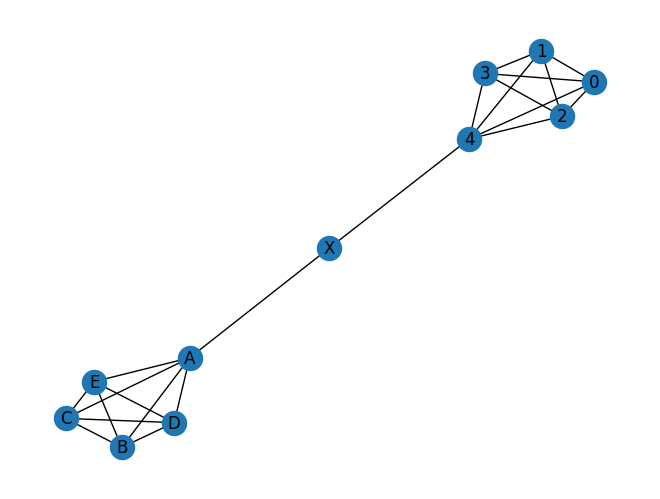

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

G1 = nx.complete_graph(5)
G2 = nx.complete_graph(5)
G2 = nx.relabel_nodes(G2, {0: "A", 1: "B", 2: "C", 3: "D", 4: "E"})
G_connector = nx.from_edgelist([(4, "X"), ("X", "A")])

G = nx.compose_all([G1, G2, G_connector])

nx.draw_spring(G, with_labels=True)

plt.show()